<a href="https://colab.research.google.com/github/jamagiwa/math_visualize/blob/main/probability_theory/characteristic_function/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特性関数

## 畳み込みによる正規分布の表現


- 畳み込みによる正規分布の表現

一様分布をグラフにしてみる

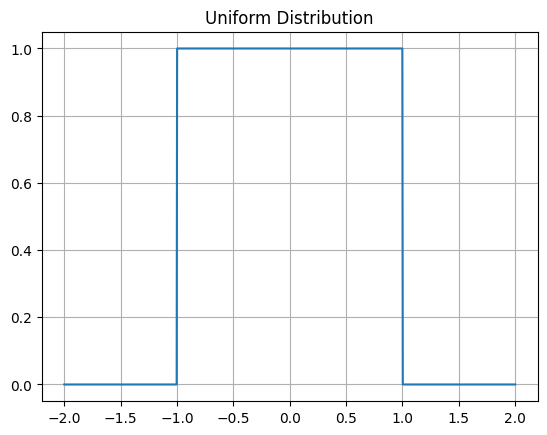

In [ ]:
#一様分布
import numpy as np
import matplotlib.pyplot as plt

#グラフの描画
#x軸の範囲
#[a, b]を少し広げた範囲までx軸を描画
#範囲内を1000個の等間隔で分ける
x = np.linspace(-2, 2, 1000)

#y軸の値の計算
#条件に基づいて数を返す関数
y = np.where(np.abs(x) <=1, 1, 0)

#plotの描画
plt.plot(x, y, label = "Uniform distribution")
plt.title("Uniform Distribution")
plt.grid(True)
plt.show()

- 一様分布同士をを畳み込み



畳み込み積分とは？　(f*g)(t) = ∫f(τ)g(t - τ)dτ

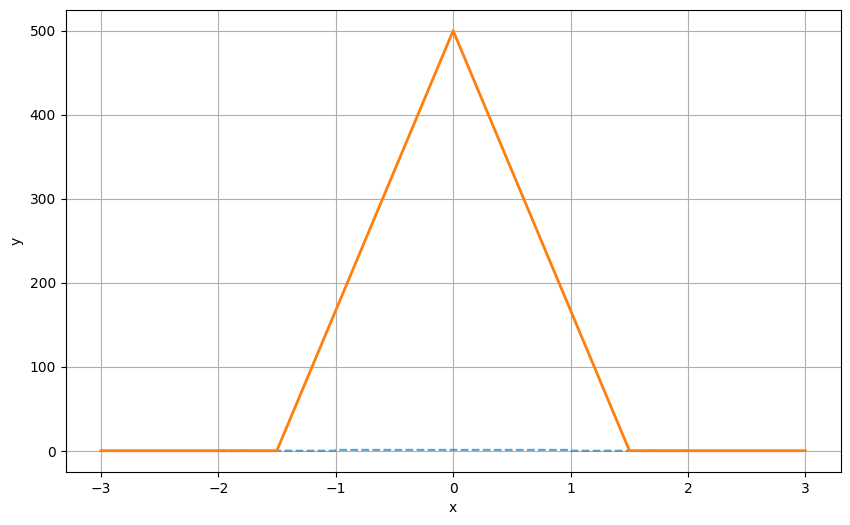

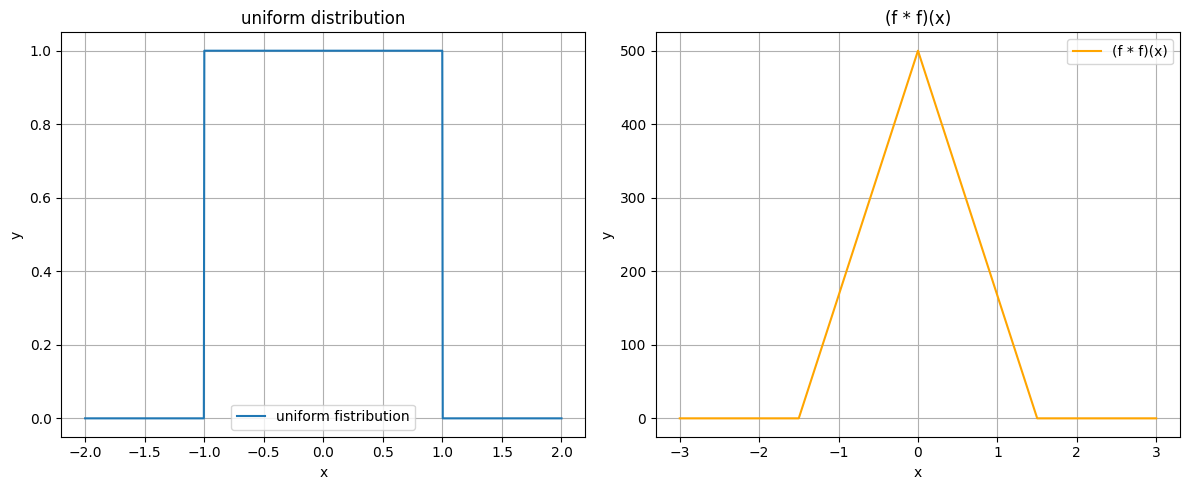

In [ ]:
#一様分布同士のの畳み込み
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

#一様分布の定義
x = np.linspace(-2, 2, 1000)
#np.abs...絶対値, xの絶対値が0.5以上ならy = 1.0でそれ以外は0
uniform_dist = np.where(np.abs(x) <=1, 1.0, 0)

#畳み込み積分の実行
conv_result = convolve(uniform_dist, uniform_dist, mode = "full")

#畳み込み後のx軸
conv_x = np.linspace(-3.0, 3.0,  len(conv_result))

#グラフの描画
plt.figure(figsize = (10, 6))

#元の一様分布
plt.plot(x, uniform_dist, label = "uniform_dist", linestyle = "--", alpha = 0.7)

#畳み込み結果
plt.plot(conv_x, conv_result, label = "(f*f)(x)", linewidth = 2)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

#一様分布と畳み込み後を別々に
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
#左側, 一様分布
axes[0].plot(x, uniform_dist, label ="uniform fistribution")
axes[0].set_title("uniform distribution")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].grid(True)
axes[0].legend()

#右側, 畳み込み後
axes[1].plot(conv_x, conv_result, label='(f * f)(x)', color='orange')
axes[1].set_title('(f * f)(x)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid(True)
axes[1].legend()

#出力
plt.tight_layout()
plt.show()


[2, -2]を1000個に分割している, [-1, 1]は500この点が存在するため、f*fは500になる。


fを確率測度、即ち0≦f(x)≦1にすれば良い


- 積分値をAreaで正規化　0<=f<=1

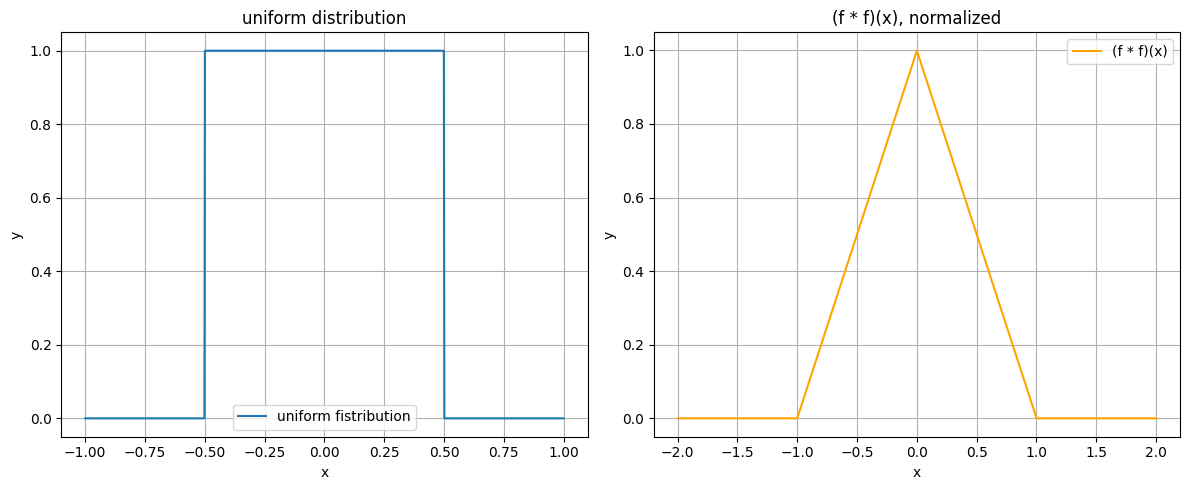

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

#一様分布の定義
x = np.linspace(-1, 1, 1000)
unform_dist = np.where(np.abs(x) <= 1, 1, 0)

#畳み込み
conv_result = convolve(uniform_dist, uniform_dist, mode = "full")
conv_x = np.linspace(-2, 2, len(conv_result))

#正規化
#畳み込み積分の値を算出
area  = np.trapezoid(conv_result,  conv_x)#np.trapz(y, x)でAreaを算出
#正規化
conv_result_normalized = conv_result /  area


#一様分布と畳み込み後を別々に
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
#左側, 一様分布
axes[0].plot(x, uniform_dist, label ="uniform fistribution")
axes[0].set_title("uniform distribution")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].grid(True)
axes[0].legend()

#右側, 畳み込み後
axes[1].plot(conv_x, conv_result_normalized, label='(f * f)(x)', color='orange')
axes[1].set_title('(f * f)(x), normalized')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid(True)
axes[1].legend()

#出力
plt.tight_layout()
plt.show()

conv_x = np.linspace(-2, 2, len(conv_result))

畳み込みをする定義域は、一様分布関数の定義域に注意。重なっていない状態を考慮。

- 同じ形のテント関数の畳み込み

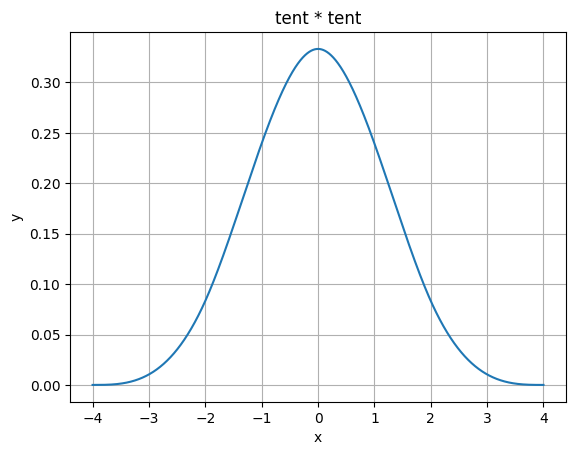

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

#一様分布
x_uniform = np.linspace(-1, 1, 10000)
uniform_dist = np.where(np.abs(x_uniform) <= 1, 1, 0 )

#一様分布の畳み込み box -> tent
tent_dist = convolve(uniform_dist,  uniform_dist, mode = "full")
x_tent = np.linspace(-2, 2, len(tent_dist))

#tentの畳み込み　tent -> smooth1
smooth1_dist = convolve(tent_dist, tent_dist, mode = "full")
x_smooth1  = np.linspace(-4, 4, len(smooth1_dist))

#正規化
area = np.trapezoid(smooth1_dist, x_smooth1)
smooth1_normalized = smooth1_dist / area

#グラフの描画
plt.plot(x_smooth1, smooth1_normalized, label = "tent * tent")
plt.title("tent * tent")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

同じ形のテント関数は正規分布の様な形状になる。

- 違う形の一様分布を畳み込みしてみる

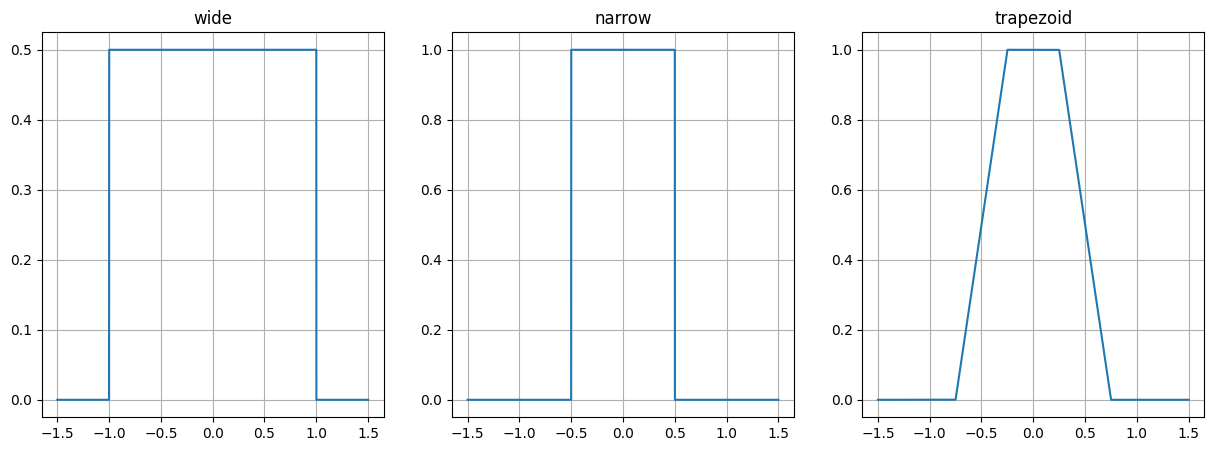

In [ ]:
# 幅の異なる一様分布を定義
x = np.linspace(-1.5, 1.5, 10000)
uniform_wide = np.where(np.abs(x) <= 1, 0.5, 0)
uniform_narrow = np.where(np.abs(x) <= 0.5, 1, 0)

#畳み込み
trapezoid_dist = convolve(uniform_wide, uniform_narrow, mode = "full")
x_trapezoid = np.linspace(-1.5, 1.5, len(trapezoid_dist))

#正規化
area = np.trapezoid(trapezoid_dist, x_trapezoid)
trapezoid_normalized = trapezoid_dist / area


#グラフ描画
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(x, uniform_wide, label = "wide")
axes[0].set_title("wide")
axes[0].grid(True)

axes[1].plot(x, uniform_narrow, label = "narrow")
axes[1].set_title("narrow")
axes[1].grid(True)

axes[2].plot(x_trapezoid, trapezoid_normalized, label = "trapezoid")
axes[2].set_title("trapezoid")
axes[2].grid(True)

台形の頂点は、一方が完全に飲み込まれている状態

- 異なる三つを畳み込みしてみる

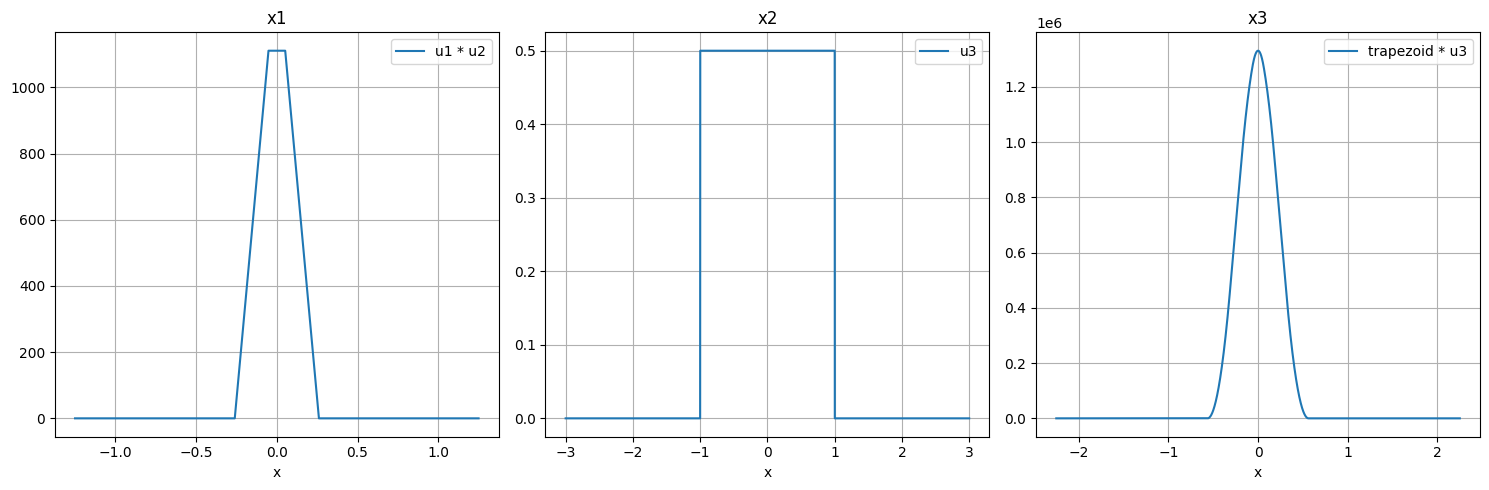

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# 3つの異なる幅を持つ一様分布を定義
# それぞれの面積が1になるように高さを設定
x_common = np.linspace(-3, 3, 10000)

# 1つ目: 幅1.0 ([-0.5, 0.5]) -> 高さ1
u1 = np.where(np.abs(x_common) <= 0.5, 1, 0)
# 2つ目: 幅1.5 ([-0.75, 0.75]) -> 高さ1/1.5
u2 = np.where(np.abs(x_common) <= 0.75, 1/1.5, 0)
# 3つ目: 幅2.0 ([-1, 1]) -> 高さ1/2
u3 = np.where(np.abs(x_common) <= 1, 1/2, 0)

# 1回目の畳み込み: u1とu2 -> 台形関数 (trapezoid)
# 新しい定義域は [-0.5 + (-0.75), 0.5 + 0.75] = [-1.25, 1.25]
trapezoid_dist = convolve(u1, u2, mode="full")
x_trapezoid = np.linspace(-1.25, 1.25, len(trapezoid_dist))

# 2回目の畳み込み: 台形関数とu3 -> 滑らかな山 (smooth)
# 新しい定義域は [-1.25 + (-1), 1.25 + 1] = [-2.25, 2.25]
smooth_dist = convolve(trapezoid_dist, u3, mode="full")
x_smooth = np.linspace(-2.25, 2.25, len(smooth_dist))

# グラフ描画
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1つ目のグラフ: 2つの一様分布の畳み込み結果（台形）
axes[0].plot(x_trapezoid, trapezoid_dist, label="u1 * u2")
axes[0].set_title("x1")
axes[0].set_xlabel("x")
axes[0].grid(True)
axes[0].legend()

# 2つ目のグラフ: 3つ目の一様分布
axes[1].plot(x_common, u3, label="u3")
axes[1].set_title("x2")
axes[1].set_xlabel("x")
axes[1].grid(True)
axes[1].legend()

# 3つ目のグラフ: 最終的な畳み込み結果（滑らかな山）
axes[2].plot(x_smooth, smooth_dist, label="trapezoid * u3")
axes[2].set_title("x3")
axes[2].set_xlabel("x")
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

畳み込み積分することで、正規分布を得ることができる。


## 特性関数のプロット

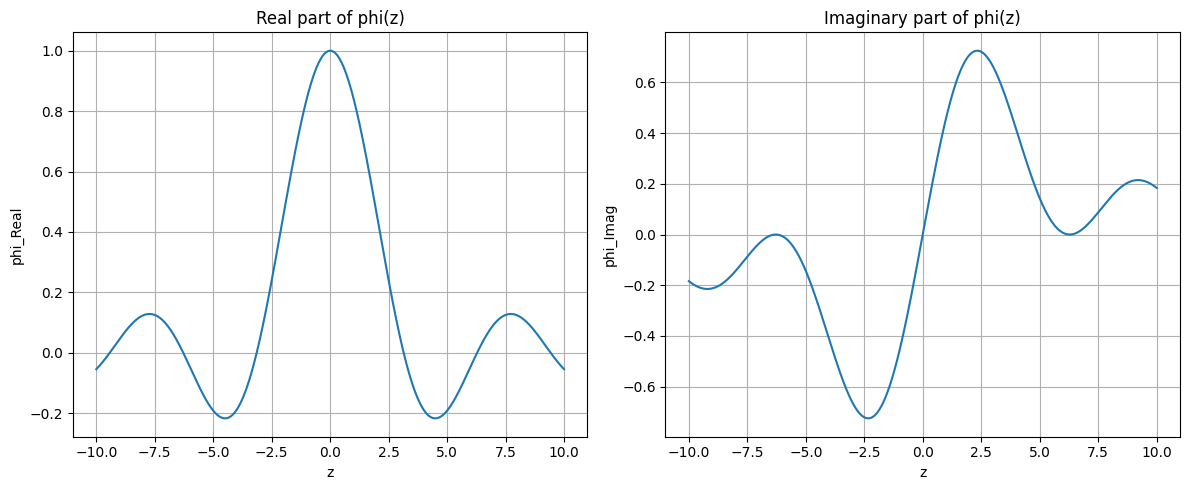

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#一様分布のパラメータ
a = 0
b = 1

#一様分布の特性関数の定義
def uniform_cf(z, a, b):
  #z=0の時だけ例外処理
  if z == 0:
    return 1.0
  else:
    return ((np.exp(1j * z* b)- np.exp(1j * z* a))/(1j * z * (b - a)))

#NumPyの配列に適用できるようにベクトル化
uniform_cf_vec = np.vectorize(uniform_cf)

#zの範囲を定義
z_values = np.linspace(-10, 10, 1000)

#特性関数の値を計算
phi_z = uniform_cf_vec(z_values, a, b)

#プロット
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(z_values, phi_z.real)
plt.title("Real part of phi(z)")
plt.grid(True)
plt.xlabel("z")
plt.ylabel("phi_Real")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(z_values, phi_z.imag)
plt.title("Imaginary part of phi(z)")
plt.grid(True)
plt.xlabel("z")
plt.ylabel("phi_Imag")
plt.grid(True)

plt.tight_layout()
plt.show()

畳み込みは, 2つの関数（通常は確率密度関数）で行う演算。特性関数は確率密度関数でがない。

確率密度関数は、元の確率密度関数のフーリエ変換。

#正規分布の特性関数の変化を見てみる

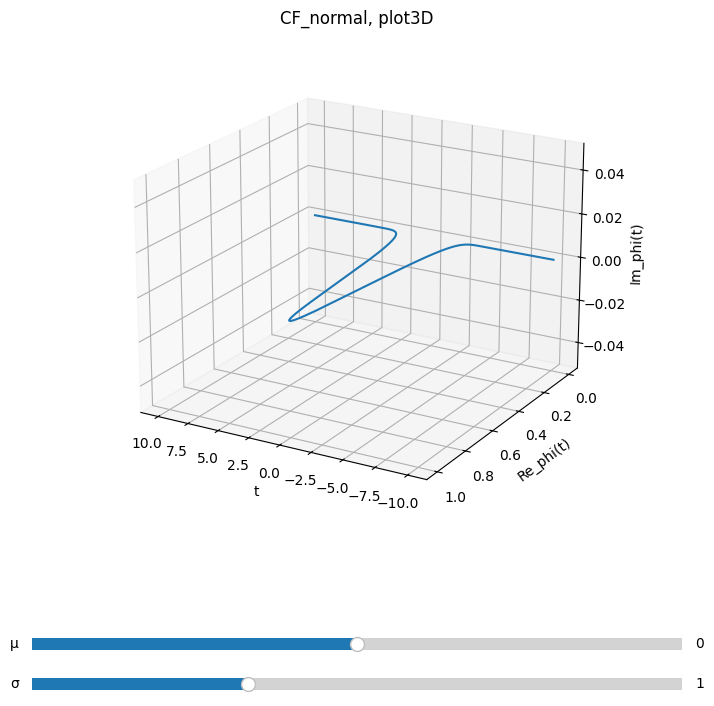

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider

#プロットの設定
#matplotlibの設定
fig = plt.figure(figsize = (10, 8)) #グラフを描画する空間の指定
ax = fig.add_subplot(111, projection = "3d") #座標軸の追加, サブプロットの配置を指定する3桁, 行, 列, 配置する場所, projectionで座標が3次元なのを指定
plt.subplots_adjust(left = 0.25, bottom = 0.25) #余白の調整, 左端と下の部分の調整, スライダーを置く余白

#初期パラメータの設定
init_mu = 0.0
init_sigma = 1.0

#正規分布の特性関数
def cf_normal (t, mu, sigma):
  return np.exp(1j * t * mu - 0.5 * sigma ** 2 * t ** 2)

#初期プロット
t_values = np.linspace(-10, 10, 10000) #tの範囲
phi_t = cf_normal(t_values, init_mu, init_sigma) #特性関数に変数を代入
line, = ax.plot(t_values, phi_t.real, phi_t.imag) #三次元の軸を指定

ax.set_title("CF_normal, plot3D")
ax.set_xlabel("t")
ax.set_ylabel("Re_phi(t)")
ax.set_zlabel("Im_phi(t)")
ax.view_init(elev = 20, azim = 120)

#スライダーを配置するための設定
#[left, bottom, width, height], 0~1.0の範囲で設定できる。
ax_mu = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor = "lightgoldenrodyellow")
ax_sigma = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor = "lightgoldenrodyellow")

#スライダーの作成
s_mu = Slider(ax_mu, "µ", -5.0, 5.0, valinit = init_mu)#スライダーの指定, 名前, 範囲, 初期値
s_sigma = Slider(ax_sigma, "σ", 0.0, 3.0, valinit = init_sigma)

#スライダーが動いた時に返すコールバック関数
def update(Val):
  current_mu = s_mu.val #スライダーが動いた時の新しいmuとσを定義
  current_sigma = s_sigma.val

  #新しいパラメータで再計算
  new_phi_t = cf_normal(t_values, current_mu, current_sigma) #動いた時の新しいCF

  #新しいデータをグラフへ更新
  line.set_data(t_values, new_phi_t.real) #x, y軸
  line.set_3d_properties(new_phi_t.imag) #y, z軸
  #関数を描画する
  fig.canvas.draw_idle() # draw_idleに変更

#スライダーにコールバック関数を登録
s_mu.on_changed(update)
s_sigma.on_changed(update)

plt.show()

#中心極限定理(Centlal Limit Theory, CLT)の証明を可視化してみる

Xₙ n=1,2.... 独立かつ同じ分布(i.d.d) μ=E(Xₙ), σ=V(X)>0, (n≥1)と仮定する。任意のa<bに対して

---
$$\lim_{n \to \infty} P\left( a < \frac{\sum_{i=1}^n X_i - n\mu}{\sigma\sqrt{n}} < b \right) = \frac{1}{\sqrt{2\pi}}\int_a^b e^{-x^2/2} 　dx $$

---



##式を分解してみる

##右辺　$$\frac{1}{2π}∫^a_bexp(-\frac{x^2}{2})dx $$

In [16]:
#exp(-x^2/2)をプロットしてみる

import numpy as np
import matplotlib.pyplot as plt

#Xの範囲を指定
x = np.linspace(-5, 5, 1000)

#exp(-x^2/2)を定義する
y = np.exp(-x**2/2)

plt.plot(x, y)
plt.title("exp(-x^2/2)")
plt.grid(True)
plt.show()

#積分する
import numpy as np
from scipy.integrate import quad

integral, error = quad(y, -1, 1)

print(f"積分値: {integral}")
print(f"誤差: {error}")

NameError: name 'error' is not defined

積分しようと思ったらできない。quadにはnumpy配列では計算できない。作り直す

/tmp/ipython-input-3074352326.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


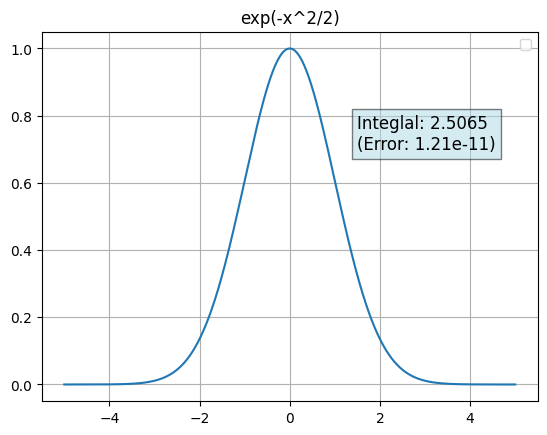

In [54]:
#やり直し
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

#exp(-x^2/2)の定義
def f(x):
  return np.exp(-x**2/2)

#積分する
integral, error= quad(f, -4, 4) #quad関数は積分と誤差の二つを出力する

#xの範囲を指定してプロット
x  = np.linspace(-5, 5, 1000)

plt.plot(x, f(x))
plt.title("exp(-x^2/2)")
plt.grid(True)
plt.text(1.5,
         0.7,
         f'Integlal:{integral: .4f}\n(Error:{error: .2e})', #f'' {}内部が入れたい関数:.xeは小数点の調整, \nは改行, 文字はただの文字
         fontsize = 12,
         bbox = dict(facecolor = "lightblue", alpha = 0.5)
         )
plt.legend()
plt.show()




体積2.5065...のベルカーブが描ける

---

$$\frac{1}{\sqrt{2π}}$$の計算をしてみる



In [56]:
a = 1/np.sqrt(2 * np.pi)
print(a)

0.3989422804014327


0.3989...になる。積分結果を１にノーマライズしてると思ったら違う？？？

N(0, 1)を描画して体積を求めてみる

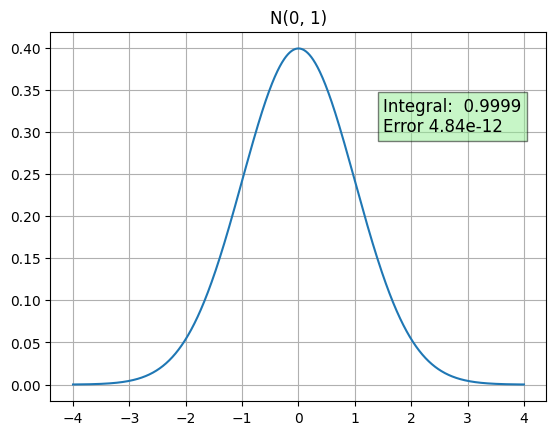

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

#µとσの定義
mu = 0
sigma = 1


#xの範囲を指定
x  = np.linspace (-4, 4, 1000)

#yの定義
y = pdf_norm(x, mu, sigma)

#正規分布のPDFの定義
def pdf_norm(x, mu, sigma):
  return norm.pdf(x, mu, sigma)

#積分する
integral, error = quad(pdf_norm,
                       -4,
                       4,
                       args=(mu, sigma)) #quadは因数が一つのみ対応 pdf_normは因数が三つなので,args()で調節

#グラフの描写
plt.plot(x, y)
plt.title("N(0, 1)")
plt.text(1.5,
         0.3,
         f'Integral: {integral: .4f}\nError{error: .2e}',
         bbox = dict(facecolor = "lightgreen", alpha = 0.5),
         fontsize = 12
         )
plt.grid(True)
plt.show()

##証明

Xᵢを$X'_n$置き換える

---
$X'_{n}=\frac{Σ{^n}_{n}X_j-μ}{σ}$ とおけば, $E(X'_n)=0$, $V(X'_n)=1$